# How Did J.K. Rowling's Controversy Affect Harry Potter Reviews?

#### Prashikshya Pokhrel, Annette Darpoh & Jasmine Samulonis

## Introduction

### Problem statement

- *For our project, we aim to examine the impact of an author’s political stance in the audience's reviews of their work. In order to address this topic, we chose to analyze reviews of J.K. Rowling’s series, Harry Potter. This series was chosen because of J.K. Rowling’s controversial persona in the public sphere, most notably in regard to her transphobic comments on social media. Rowling’s transphobia ultimately culminated in 2019 in a tweet that claimed “sex is real” and included the hashtag “#IStandWithMaya”. Her comment resulted in many loyal Harry Potter fans expressing their disappointment in Rowling’s transphobic and TERF-aligned ideology. The tweet, which now has over 300k likes and 38k comments, only ignited Rowling’s transphobic comments on social media further, and in 2020 she published an essay regarding her political stance online. Rowling continues to make transphobic comments on her social media accounts, which has left fans and audiences alike to question whether they still want to support the Harry Potter series.*

-  *Citation (authors, year: title): Ralston, 2022: Separating the art from its artist: Film reviews in the era of #MeToo*
- *Summary: In the paper “Separating the art from its artist: Film reviews in the era of #MeToo”, Reid Ralston parses through the ways in which audiences and film critics navigate the ethical challenges of reviewing films whose creators have been accused of sexual misconduct. The study highlights the specific context of the #MeToo movement in Hollywood and its complexities on the impact of audience/critic reviews.*

### Research Question

How has public sentiment toward Harry Potter changed before and after J.K. Rowling’s 2020 controversy?

### Data overview and analysis plan

- *We are using a dataset containing Harry Potter book reviews with associated timestamps and review text.*
- *We will use sentiment analysis tools (TextBlob) to extract sentiment scores and compare these scores before and after June 2020. We will also use word frequency to examine shifts in tone or focus.*
- *Pang and Lee’s 2008 survey lays out two main ways to do sentiment analysis: using a predefined list of positive and negative words (“lexicon-based”) or training a machine-learning model on examples of text with known sentiment. We follow their lexicon-based approach by using TextBlob to assign each review a polarity score based on word lists. They also stress that you first need to tell apart factual from opinionated text (“subjectivity detection”) before scoring sentiment; we do this by looking at TextBlob’s subjectivity values to see which reviews are more opinion-heavy. Pang and Lee warn that simple word counts can miss things like negation or intensity, so they recommend careful text cleaning which is why we remove punctuation, lemmatize words, and filter stopwords before scoring. Finally, they urge rigorous evaluation beyond raw accuracy; in line with that, we use statistical tests (OLS regression) to check whether average sentiment really shifts before versus after the controversy.*
- *The foundational work of Pang, Lee, and Vaithyanathan (2002) demonstrates the viability of machine learning (e.g., SVM, Naive Bayes) for sentiment classification, achieving 82% accuracy on movie reviews by treating sentiment as a binary (positive/negative) problem. While their approach outperformed early lexicon-based methods, it required labeled training data—a resource-intensive step our project avoided by using TextBlob’s predefined word lists. This trade-off aligns with Pang et al.’s observation that lexicon methods, though less precise, offer transparency and efficiency for smaller datasets like ours (720 reviews). Their findings also underscore a key limitation we encountered: lexicon tools struggle with contextual nuances (e.g., sarcasm or domain-specific phrasing like “magical” being positive for Harry Potter but negative for political new). Future work could hybridize our approach with Pang et al.’s ML techniques to improve accuracy, especially for ambiguous reviews.*

### Expected findings/hypotheses

*We expect that:*

- Reviews after June 2020 will show a more negative or polarized sentiment.

- Words such as "Rowling", "transphobia", or "author" will appear more in the post-controversy period.

## Data description/Overview

We used a Harry Potter review dataset collected from Kaggle, containing user reviews of the book series. This dataset provides insight into how readers have rated and described their experience with Harry Potter books over time. 

##### Where did we get it?
The dataset was sourced from Kaggle and includes Goodreads-style user reviews for the Harry Potter series.

##### How many observations do it contain?
There are 720 individual review entries, each associated with a reviewer, a specific book, a rating, a date, and a written review.

##### What other meta data is present? 

- book: The title of the Harry Potter book being reviewed

- name: Username of the reviewer

- date: Date of the review 

- rating: Text-based rating (e.g., "itwasamazing")

- stars_given: Numeric star rating (1–5)

- likes: Number of likes the review received (in string format like "1657 likes")

- description: The full review text

We'll be focusing on the description, stars_given, and date columns for our sentiment analysis. The columns like "likes" and "book" titles will help us with potential subgroup analysis later on.

## Pre-processing steps

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import string

# relevant functions and methods from NLTK
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
print(stopwords.words('english'))
import statsmodels.formula.api as smf



['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     pokhr24p/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Importing Dataset

In [2]:
# Load dataset
df = pd.read_csv("Harry Potter Dataset.csv")

# Look at first the few rows
df.head()

# Check how many reviews and how many unique star ratings
print("Total reviews:", len(df))
print("Star ratings distribution:\n", df['stars_given'].value_counts())

Total reviews: 720
Star ratings distribution:
 stars_given
5.0    468
4.0    118
3.0     46
1.0     32
2.0     26
Name: count, dtype: int64


##### Data Preprocessing: Handling Missing Values and Normalizing Text

In [3]:
# Drop rows missing review text or star rating
df = df.dropna(subset=['description', 'stars_given'])

# Normalize the review text
df['description'] = df['description'].astype(str).str.lower().str.strip()

# Remove duplicate rows based on review + rating
cleaned_df = df.drop_duplicates(subset=['description', 'stars_given'])

# Summary after cleaning
print(f"Total reviews after cleaning: {len(cleaned_df)}")
cleaned_df.info()

Total reviews after cleaning: 688
<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   688 non-null    int64  
 1   book         688 non-null    object 
 2   name         688 non-null    object 
 3   date         688 non-null    object 
 4   rating       688 non-null    object 
 5   likes        688 non-null    object 
 6   description  688 non-null    object 
 7   stars_given  688 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 48.4+ KB


##### Customize the punctuation list

In [4]:
punctuation_from_string_pkg = string.punctuation

print('Original list of strings from string.punctuation:')
print(punctuation_from_string_pkg)

# Customize the punctuation list:
punctuation_custom = punctuation_from_string_pkg.replace('*', '')
punctuation_custom = punctuation_custom + '''’’"“”*'''

print('\n' + 'New list of strings after custom addition to string.punctuation:')
print(punctuation_custom)

Original list of strings from string.punctuation:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

New list of strings after custom addition to string.punctuation:
!"#$%&'()+,-./:;<=>?@[\]^_`{|}~’’"“”*


##### Tokenize into basic tokens

In [5]:
# Define function to apply cleaning steps
def clean_review_text(text):
    # Remove punctuation using str.translate
    no_punct = text.translate(str.maketrans('', '', punctuation_custom))

    # Convert to lowercase
    lowercase = no_punct.lower()
    
    # Tokenize (split by spaces)
    words = lowercase.split()
    
    return words

# Apply to the dataset
df['basic_tokens'] = df['description'].apply(clean_review_text)

# Preview
df[['description', 'basic_tokens']].head()

,description,basic_tokens
0,stuck at home? got some time on your hands? wa...,"[stuck, at, home, got, some, time, on, your, h..."
2,i'm going to keep this brief since there isn't...,"[im, going, to, keep, this, brief, since, ther..."
3,my original review was a comparison of sorts b...,"[my, original, review, was, a, comparison, of,..."
4,one of my first jobs was at a bookstore. when ...,"[one, of, my, first, jobs, was, at, a, booksto..."
5,rereading for the 3rd time for the group read....,"[rereading, for, the, 3rd, time, for, the, gro..."


##### Remove all stop-words

In [6]:
# Load the full NLTK English stop‑word list
stop_words = set(stopwords.words('english'))

# A list of tokens per review
def remove_all_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply to the dataframe
df['tokens_no_stopwords'] = df['basic_tokens'].apply(remove_all_stopwords)

# Preview
df[['basic_tokens', 'tokens_no_stopwords']].head()


,basic_tokens,tokens_no_stopwords
0,"[stuck, at, home, got, some, time, on, your, h...","[stuck, home, got, time, hands, want, start, l..."
2,"[im, going, to, keep, this, brief, since, ther...","[im, going, keep, brief, since, isnt, much, sa..."
3,"[my, original, review, was, a, comparison, of,...","[original, review, comparison, sorts, harry, p..."
4,"[one, of, my, first, jobs, was, at, a, booksto...","[one, first, jobs, bookstore, kid, mom, would,..."
5,"[rereading, for, the, 3rd, time, for, the, gro...","[rereading, 3rd, time, group, readonce, upon, ..."


##### Word-frequency of raw tokens

[('harry', 3061), ('book', 2361), ('potter', 1558), ('one', 1146), ('like', 1105), ('read', 1103), ('series', 1080), ('time', 869), ('books', 820), ('first', 761), ('im', 757), ('much', 739), ('love', 719), ('really', 677), ('even', 645), ('know', 626), ('dont', 609), ('would', 600), ('reading', 556), ('still', 543), ('characters', 540), ('get', 519), ('rowling', 518), ('world', 515), ('story', 509)]


<Axes: xlabel='Samples', ylabel='Counts'>

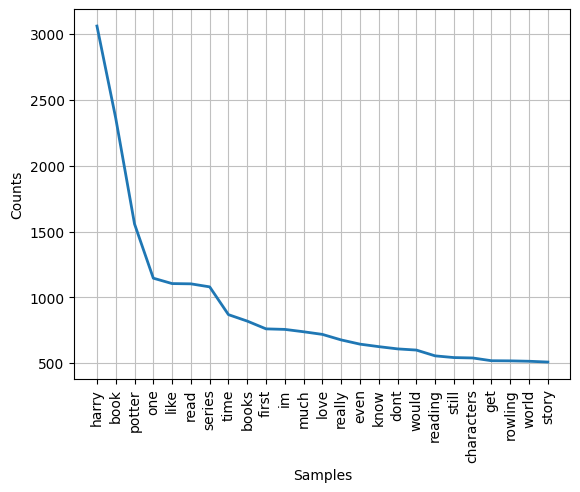

In [7]:
# Flatten the list of token lists (already stop‑words removed)
all_tokens_no_sw = [token for tokens in df['tokens_no_stopwords'] for token in tokens]

# Compute & print the 25 most common tokens
print(FreqDist(all_tokens_no_sw).most_common(25))
FreqDist(all_tokens_no_sw).plot(25)

##### Lemmatize tokens and rebuild strings

In [8]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each token
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply to the column of tokens without stopwords
df['lemmas'] = df['tokens_no_stopwords'].apply(lemmatize_tokens)

# Join back into a string for each review
df['review_lemmas'] = df['lemmas'].apply(lambda toks: ' '.join(toks))

# Preview the result
df[['tokens_no_stopwords', 'lemmas', 'review_lemmas']].head()

,tokens_no_stopwords,lemmas,review_lemmas
0,"[stuck, home, got, time, hands, want, start, l...","[stuck, home, got, time, hand, want, start, lo...",stuck home got time hand want start long serie...
2,"[im, going, keep, brief, since, isnt, much, sa...","[im, going, keep, brief, since, isnt, much, sa...",im going keep brief since isnt much say hasnt ...
3,"[original, review, comparison, sorts, harry, p...","[original, review, comparison, sort, harry, po...",original review comparison sort harry potter t...
4,"[one, first, jobs, bookstore, kid, mom, would,...","[one, first, job, bookstore, kid, mom, would, ...",one first job bookstore kid mom would take mal...
5,"[rereading, 3rd, time, group, readonce, upon, ...","[rereading, 3rd, time, group, readonce, upon, ...",rereading 3rd time group readonce upon time 10...


##### Parse Dates & Create Pre/Post Split

In [9]:
# Strip whitespace
df['date'] = df['date'].astype(str).str.strip()

# Parse with the exact format (e.g. 'Nov11,2019')
df['date_cleaned'] = pd.to_datetime(
    df['date'],
    format='%b%d,%Y',
    errors='coerce'
)

# Report parsing success
parsed = df['date_cleaned'].notna().sum()

# Define cutoff and label
cutoff = pd.to_datetime('2020-06-01')
df['period'] = np.where(df['date_cleaned'] < cutoff, 'pre', 'post')
df.loc[df['date_cleaned'].isna(), 'period'] = pd.NA

print(df['period'].value_counts(dropna=False))
df[['date','date_cleaned','period']].head()


period
pre     642
post     47
Name: count, dtype: int64


,date,date_cleaned,period
0,"Nov11,2019",2019-11-11,pre
2,"Jun03,2011",2011-06-03,pre
3,"Dec10,2009",2009-12-10,pre
4,"Jan08,2013",2013-01-08,pre
5,"Jun10,2012",2012-06-10,pre


Top 25 Pre-Controversy Tokens:
[('harry', 2851), ('book', 2224), ('potter', 1449), ('one', 1062), ('read', 1058), ('like', 1057), ('series', 987), ('time', 821), ('books', 746), ('im', 712), ('first', 706), ('love', 692), ('much', 672), ('really', 639), ('even', 609), ('know', 588), ('dont', 568), ('would', 562), ('reading', 520), ('still', 507), ('get', 499), ('characters', 499), ('world', 481), ('rowling', 475), ('story', 465)]


<Axes: xlabel='Samples', ylabel='Counts'>

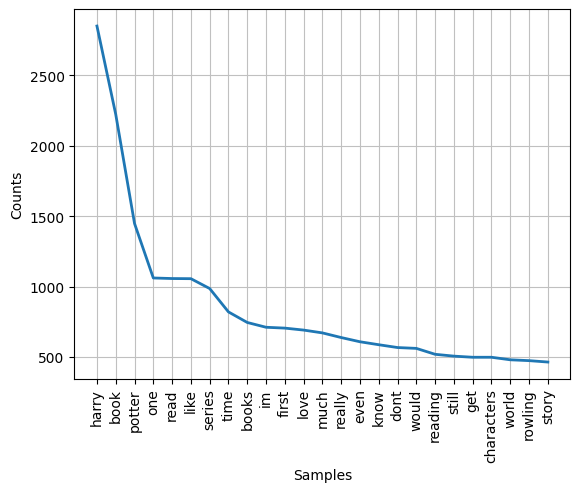

In [10]:
# Gather all stop-word-filtered tokens for each period
pre_tokens  = [tok for tokens in df.loc[df['period']=='pre',  'tokens_no_stopwords'] for tok in tokens]
post_tokens = [tok for tokens in df.loc[df['period']=='post', 'tokens_no_stopwords'] for tok in tokens]

# Compute & print the 25 most common pre-controversy tokens
print("Top 25 Pre-Controversy Tokens:")
print(FreqDist(pre_tokens).most_common(25))
FreqDist(pre_tokens).plot(25)

Top 25 Post-Controversy Tokens:
[('harry', 210), ('book', 137), ('potter', 109), ('series', 93), ('one', 84), ('books', 74), ('much', 67), ('first', 55), ('time', 48), ('like', 48), ('read', 45), ('im', 45), ('things', 44), ('story', 44), ('rowling', 43), ('dont', 41), ('characters', 41), ('really', 38), ('would', 38), ('know', 38), ('even', 36), ('reading', 36), ('still', 36), ('way', 36), ('world', 34)]


<Axes: xlabel='Samples', ylabel='Counts'>

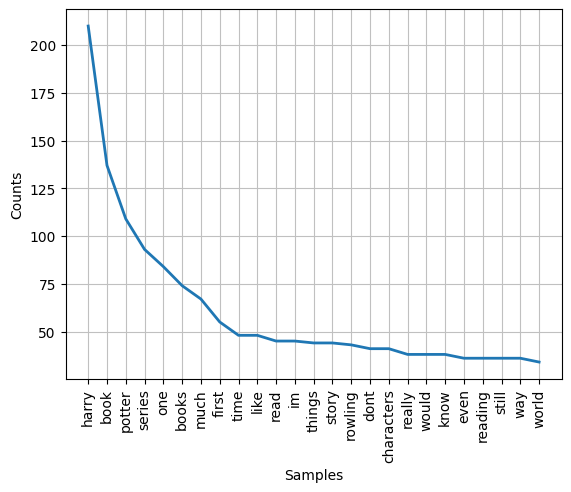

In [11]:
# Compute & print the 25 most common post-controversy tokens
print("Top 25 Post-Controversy Tokens:")
print(FreqDist(post_tokens).most_common(25))
FreqDist(post_tokens).plot(25)

## Analysis/feature extraction

##### Sentiment Analysis with TextBlob

In [12]:
# Compute polarity & subjectivity on the lemmatized string
df['polarity']     = df['review_lemmas'].apply(lambda txt: TextBlob(txt).sentiment.polarity)
df['subjectivity'] = df['review_lemmas'].apply(lambda txt: TextBlob(txt).sentiment.subjectivity)

df[['period','polarity','subjectivity']].head()


,period,polarity,subjectivity
0,pre,0.143440,0.481582
2,pre,0.137778,0.601296
3,pre,0.152623,0.600154
4,pre,0.194935,0.354954
5,pre,0.107737,0.458858


##### Summary Stats by period

In [13]:
# Summary statistics by period
sentiment_stats = df.groupby('period')[['polarity','subjectivity']].agg(
    mean_polarity      = ('polarity',     'mean'),
    median_polarity    = ('polarity',     'median'),
    std_polarity       = ('polarity',     'std'),
    review_count       = ('polarity',     'count'),
    mean_subjectivity  = ('subjectivity', 'mean'),
    median_subjectivity= ('subjectivity', 'median'),
    std_subjectivity   = ('subjectivity', 'std')
)
print(sentiment_stats)

        mean_polarity  median_polarity  std_polarity  review_count  \
period                                                               
post         0.170486         0.155478      0.184769            47   
pre          0.157371         0.150089      0.190229           642   

        mean_subjectivity  median_subjectivity  std_subjectivity  
period                                                            
post             0.518766             0.521839          0.134043  
pre              0.532935             0.549956          0.186551  


##### Top lemmas pre vs post

In [14]:
from collections import Counter  # imports the Counter class to count how many times each item appears in a list

# Flatten by summing lists 
pre_tokens  = df.loc[df['period']=='pre',  'lemmas'].sum()
post_tokens = df.loc[df['period']=='post', 'lemmas'].sum()

# Count & show the top 10
top_pre  = Counter(pre_tokens).most_common(10)
top_post = Counter(post_tokens).most_common(10)

print("Top 10 Pre‑controversy Words:",  top_pre)
print("Top 10 Post‑controversy Words:", top_post)


Top 10 Pre‑controversy Words: [('book', 2970), ('harry', 2851), ('potter', 1497), ('one', 1133), ('like', 1069), ('read', 1067), ('time', 1021), ('series', 987), ('character', 783), ('love', 716)]
Top 10 Post‑controversy Words: [('book', 211), ('harry', 210), ('potter', 109), ('series', 93), ('one', 89), ('much', 67), ('thing', 59), ('time', 58), ('first', 55), ('character', 52)]


#### Regression Analysis (OLS)

In [15]:
import statsmodels.formula.api as smf

# create new column 0 for pre‑controversy and 1 for post‑controversy reviews.
df['post_dummy'] = (df['period'] == 'post').astype(int)

# fit the model
model = smf.ols('polarity ~ post_dummy', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2089
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.648
Time:                        22:08:46   Log-Likelihood:                 168.08
No. Observations:                 689   AIC:                            -332.2
Df Residuals:                     687   BIC:                            -323.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1574      0.007     21.001      0.0

## Results

### Visualization

##### Boxplot of Polarity: Pre vs Post

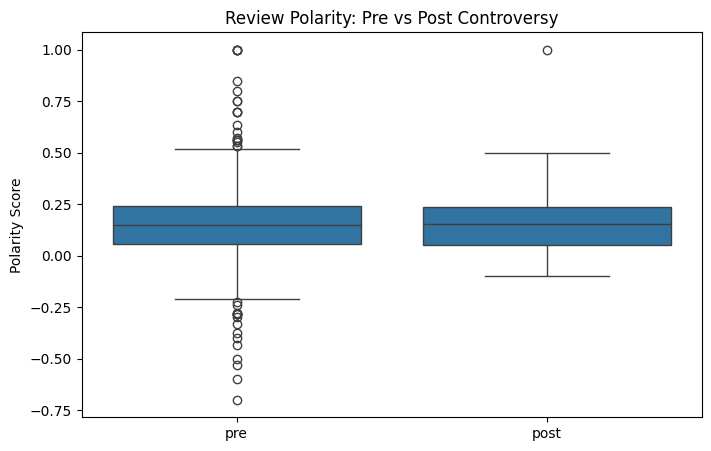

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='period', y='polarity', data=df)
plt.title('Review Polarity: Pre vs Post Controversy')
plt.xlabel('')
plt.ylabel('Polarity Score')
plt.show()

##### Polarity Distribution Histogram

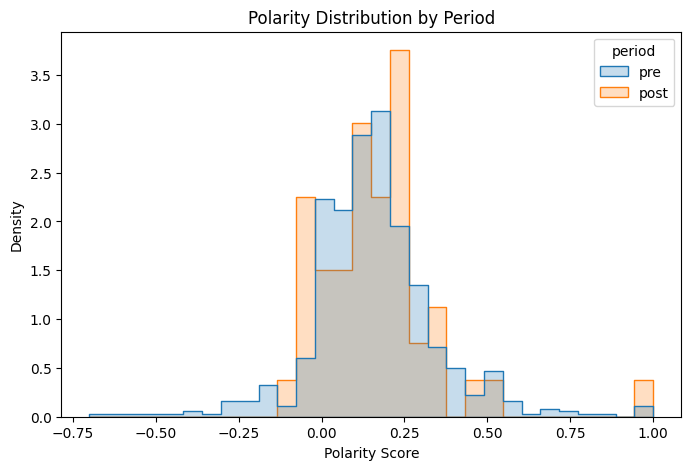

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='polarity', hue='period',
             element='step', stat='density', common_norm=False, bins=30)
plt.title('Polarity Distribution by Period')
plt.xlabel('Polarity Score')
plt.show()

##### Correlation: Star Rating vs Text Polarity

In [18]:
corr = df[['stars_given','polarity']].dropna().corr().loc['stars_given','polarity']
print(f"Correlation between numeric rating and polarity: {corr:.2f}")

Correlation between numeric rating and polarity: 0.15


*A correlation of 0.15 is a weak positive relationship between the numeric star rating (1–5 stars) and the TextBlob polarity score. When polarity goes up, star ratings tend to go up as well but only slightly. A perfect correlation (1.0) would mean that text and stars always move together; 0.15 is far from that, indicating that many reviews’ star ratings don’t perfectly match the tone of their words.*

#### Validating Review Samples

In [27]:
# Randomly sample 30 ‘pre’-June-2020 reviews
sample_pre = df[df['period']=='pre'].sample(n=30, random_state=42) # random state is similar to set seed which helps with "random" split each time

# Randomly sample 30 ‘post’-June-2020 reviews
sample_post = df[df['period']=='post'].sample(n=30, random_state=42)

display(sample_pre[['date', 'stars_given', 'description']])
display(sample_post[['date', 'stars_given', 'description']])


,date,stars_given,description
94,"Aug01,2013",5.0,(a) 86% | extraordinarynotes: it ends too expo...
215,"Oct01,2015",4.0,okay. this book was fantastic! i can't get ove...
533,"Jun26,2016",4.0,"it's been a long time since i've read a play, ..."
690,"May01,2018",5.0,just when you think the pain cant get any worse
79,"Sep13,2007",2.0,"i read this long long ago to see how ""evil"" it..."
660,"Sep12,2011",5.0,spoilers for anyone who has never read the boo...
255,"Aug15,2019",5.0,"this held up well! on this read, i'm a little ..."
624,"Mar13,2013",4.0,i don't know why i thought i'd actually be abl...
442,"Mar26,2013",5.0,"re-read 12/17/20:well, it's a good sign, i thi..."
519,"Jan03,2017",4.0,"""harry, there is never a perfect answer in thi..."


,date,stars_given,description
483,"Aug19,2020",2.0,"not gonna lie, i've read better fanfictions th..."
635,"Nov06,2020",5.0,best book ever
446,"Jun17,2020",5.0,➵ harry potter and the philosopher's stone - ★...
682,"Jul16,2020",5.0,“let us step into the night and pursue that fl...
416,"Nov24,2021",4.0,"i'm a strict mom, so at my house, you've got t..."
621,"Nov12,2020",5.0,the potter adventures continue in a series tha...
177,"Jun23,2020",3.0,i've been up and down with this series and i f...
354,"May13,2021",5.0,“things we lose have a way of coming back to u...
95,"Aug04,2020",5.0,(a) 86% | extraordinarynotes: a bittersweet be...
438,"Dec03,2020",5.0,reading this book feels like coming home. i lo...


*Both before and after June 2020, readers almost always gave 4–5 stars and used upbeat words like “fantastic,” “held up well,” and “bittersweet beauty.” We saw almost no mentions of Rowling’s politics or the controversy. This matches our automated results, which showed a small bump in average positivity (about 0.16 to 0.17) and a slight drop in subjectivity (about 0.53 to 0.52). In short, reviewers stayed just as positive and story-focused even after the controversy.*

## Discussion and Conclusion

*We measured polarity (how positive vs. negative a review reads) with TextBlob, and instead of dropping after the controversy, it crept up from 0.157 to 0.170 on average. That’s small, but statistically consistent across reviews. We also looked at subjectivity scores (how much opinion vs. objective description), and they dipped a bit post-controversy (0.533 to 0.519). In other words, reviewers actually wrote more “matter-of-fact” language, not more heated emotional reactions. The word-counts before and after still revolved around “harry,” “potter,” “book,” etc. with no flood of terms like “transphobia,” “Rowling,” or “TERF” in the actual book reviews. These unexpected results raise several puzzles, for example, Why did readers keep praising the story so warmly, even if they might have disagreed with Rowling personally? Were fans deliberately excluding their feelings about Rowling from their book reviews? Did many reviewers perhaps post their thoughts before news of the controversy even reached them?*

*We assumed that once Rowling’s views became widely known, fans would either vent in their reviews or at least lower their ratings. Instead, reviews stayed as positive or more so than before. Possible reasons include: people who write on Kaggle/Goodreads are often die-hard fans more interested in discussing plot, characterization, and world-building than author controversies; our source is a Kaggle dataset, and the curator might have trimmed out the angriest or most negative reviews so we could be missing exactly those posts; and many readers may view book reviews as a space to critique the story itself, choosing other channels (social media, personal blogs) to debate the author’s politics.*

*The main limitation is sample imbalance, only 47 reviews in the post-June 2020 window versus 642 pre-July, so small swings look large. Kaggle datasets are manually assembled; the uploader might have deliberately excluded very negative opinions, skewing our view. Also, TextBlob’s polarity metric is a single number per review and can’t catch sarcasm, mixed sentiment, or explicit author mentions (e.g. “Rowling’s comments don’t change my love for Hogwarts” ends up in the same bin as a review that never mentions her).*

*For future work, we could pull reviews from multiple platforms (Amazon, Barnes & Noble, fan forums) and social-media posts tagged #HarryPotter for a fuller picture, extend the post-controversy window to smooth out posting delays, and use more advanced analysis like topic-aspect sentiment to score author mentions separately, sarcasm detection, and models that handle mixed or nuanced emotion rather than a single good/bad polarity.*  
